# Sentiment Analysis using NLP Part 1

In [1]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
# Read the data

df = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place. 25 times,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Text Processing

In [4]:
# Clean the text by removing any extra characters 

import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Steps for cleaning the first review and apply for loop on all the reviews

df['Review'][0]
review = re.sub('[^a-zA-Z]', ' ', df['Review'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [6]:
review

'wow love place time'

In [7]:
# Do the same steps for all the reviews in the dataset using the for loop

corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus

['wow love place time',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happi

# Feature Extraction

## Bag of Words Model

In [9]:
# Create the bag of words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 1500) # We restrict the words to 1500 which keeps the most frequent words

In [10]:
X = cv.fit_transform(corpus).toarray() # independent variables

In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 'bean', 'beat',

In [13]:
X.shape

(1000, 1500)

In [14]:
y = df.iloc[:, 1].values # dependent variable (These are your Liked values from the dataset)

# Modeling

## Naive Bayes Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

# Fitting classifier to the Training set
gnb.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = gnb.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[131 116]
 [ 42 211]]
Accuracy Score: 0.684
F1 Score: 0.7275862068965517
Recall Score: 0.83399209486166
Precision Score: 0.6452599388379205


## KNN Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[200  47]
 [137 116]]
Accuracy Score: 0.632
F1 Score: 0.5576923076923077
Recall Score: 0.45849802371541504
Precision Score: 0.7116564417177914


## Support Vector Machine SVM Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn import svm

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
# C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train) # we can use rbf, poly instead of linear too.

# Predicting the Test set results 
y_pred = svc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[205  42]
 [ 90 163]]
Accuracy Score: 0.736
F1 Score: 0.7117903930131005
Recall Score: 0.6442687747035574
Precision Score: 0.7951219512195122


# Decision Tree Classification Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model_tree.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[192  55]
 [114 139]]
Accuracy Score: 0.662
F1 Score: 0.621923937360179
Recall Score: 0.549407114624506
Precision Score: 0.7164948453608248


# Random Forest Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[230  17]
 [142 111]]
Accuracy Score: 0.682
F1 Score: 0.5826771653543307
Recall Score: 0.43873517786561267
Precision Score: 0.8671875


# Feature Extraction

## TF IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [21]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [22]:
X = corpus

In [23]:
X.shape

(1000, 179)

# Modeling

## Random Forest Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[231  16]
 [152 101]]
Accuracy Score: 0.664
F1 Score: 0.545945945945946
Recall Score: 0.39920948616600793
Precision Score: 0.8632478632478633


## Decision Tree Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model_tree.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[201  46]
 [108 145]]
Accuracy Score: 0.692
F1 Score: 0.6531531531531533
Recall Score: 0.5731225296442688
Precision Score: 0.7591623036649214


## Support Vector Machine SVM Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn import svm

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
# C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train) # we can use rbf, poly instead of linear too.

# Predicting the Test set results 
y_pred = svc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[199  48]
 [ 90 163]]
Accuracy Score: 0.724
F1 Score: 0.7025862068965517
Recall Score: 0.6442687747035574
Precision Score: 0.7725118483412322


## KNN Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[216  31]
 [150 103]]
Accuracy Score: 0.638
F1 Score: 0.5322997416020672
Recall Score: 0.40711462450592883
Precision Score: 0.7686567164179104


## Naive Bayes Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

# Fitting classifier to the Training set
gnb.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = gnb.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[148  99]
 [ 72 181]]
Accuracy Score: 0.658
F1 Score: 0.6791744840525328
Recall Score: 0.7154150197628458
Precision Score: 0.6464285714285715


# Questions

What is Natural Language processing and why is it important in the context of data analysis in today’s world?

Natural language processing is a subdomain of field of computer science, linguistics and AI, it is connected with how we interactions amongst computers and human beings and their language, particularly looking at how it is possible to program computers to analyse and process natural language data large amounts.

It is important in context of data analysis for today's world as we see that textual data is being generated at an exponetial rate such as tweets, comments on social media, translation data from one language to another etc. to process such large amount of information we need something like NLP to help us make it possible to understand human language using computers.

What is the purpose of stopwords in NLP?

Stopwords are set of very commonly and daily used words in any language. For example, in English, “that”, “and” and “them” etc, these words would qualify as stop words. In Natural language processing we use stop words in order to eliminate unimportant words, allowing our model to focus on the important words instead of spending time and its power to understand common words.

What is the purpose of toarray() in the following code

X = cv.fit_transform(corpus).toarray()

toarray() function is used here to converted the fitted results into an arraysom that it can be further added to dataframe to perform further analysis by passing it to machine learning models.

Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.

| Model | Accuracy Score | F1 Score | Recall Score | Precision Score |
|:-:|:-:|:-:|:-:|:-:|
| Naive Bayes | 68.4% | 72.7% | 83.3% | 64.5% |
| SVM Model | 73.6% | 71.1% | 64.4% | 79.5% |
| Decision Tree Model | 66.2% | 62.1% | 54.9% | 71.6% |
| Random Forest Model | 68.2% | 58.2% | 43.8% | 86.7% |
| KNN Model | 63.2% | 55.7% | 45.8% | 71.1% |

| Model | Accuracy Score | F1 Score | Recall Score | Precision Score |
|:-:|:-:|:-:|:-:|:-:|
| Naive Bayes | 65.8% | 67.9.7% | 71.5% | 64.6% |
| SVM Model | 72.4% | 70.2% | 64.4% | 77.2% |
| Decision Tree Model | 69.2% | 65.3% | 57.3% | 75.9% |
| Random Forest Model | 66.4% | 55.4% | 39.9% | 86.3% |
| KNN Model | 63.8% | 53.2% | 40.7% | 76.8% |

Which model predicts the best?

Based on the above scores, we can say that Support Vector Machine (SVM) model is the best performing model.

# Sentiment Analysis using NLP Part 2 with the new dataset

In [29]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
# Read the file

df = pd.read_csv("Tweets.csv")

In [31]:
# Find the shape

df.shape

(14640, 15)

In [32]:
# Have a quick look at the dataset

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Perform Exploratory Analysis

<AxesSubplot:ylabel='airline'>

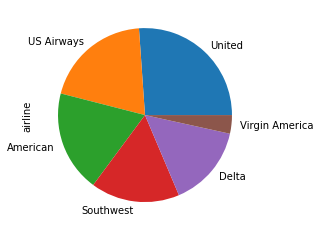

In [33]:
# Create a pie chart by airline %

df['airline'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='airline_sentiment'>

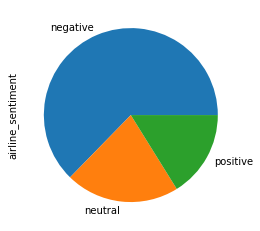

In [34]:
# Create a pie chart by airline sentiment

df['airline_sentiment'].value_counts().plot(kind='pie')

<AxesSubplot:>

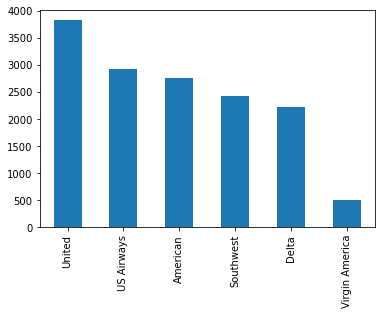

In [35]:
# Create a bar chart by airline and airline sentiment

df['airline'].value_counts().plot(kind='bar')

<AxesSubplot:>

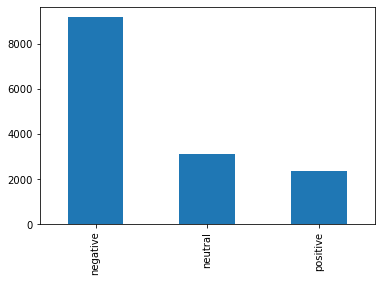

In [36]:
df['airline_sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:>

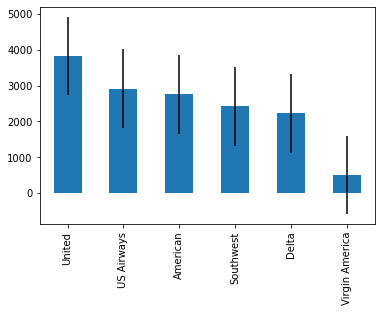

In [37]:
# Create a bar plot for airline sentiment and airline sentiment confidence

df['airline'].value_counts().plot.bar(yerr=df['airline'].value_counts().std())

<AxesSubplot:>

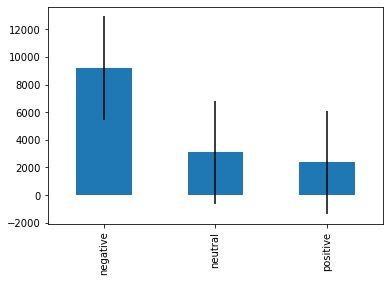

In [38]:
df['airline_sentiment'].value_counts().plot.bar(yerr=df['airline_sentiment'].value_counts().std())

In [39]:
# Create a new dataframe that will only have 2 relevant columns
# Identify the 2 columns
# For airline_sentiment I only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe

df_new = df[['text','airline_sentiment']]
df_new = df_new[df_new['airline_sentiment']!='neutral'].reset_index(drop=True)
df_new['airline_sentiment'] = df_new['airline_sentiment'].map({'positive':1,'negative':0})

In [40]:
# Your final dataframe should look like this

df_new.head()

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,1
1,@VirginAmerica it's really aggressive to blast...,0
2,@VirginAmerica and it's a really big bad thing...,0
3,@VirginAmerica seriously would pay $30 a fligh...,0
4,"@VirginAmerica yes, nearly every time I fly VX...",1


In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Use this to create the corpus. Use the same steps from the last lab

In [42]:
# Steps for cleaning the first review and apply for loop on all the reviews

df_new['text'][0]
review = re.sub('[^a-zA-Z]', ' ', df_new['text'][1]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [43]:
review

'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours'

In [44]:
# Do the same steps for all the reviews in the dataset using the for loop

corpus = [] # Build a new list for all the words from all the tweets
# corpus is a collection of text and a common term used in NLP
for i in range (0, 11541):
    review = re.sub('[^a-zA-Z]', ' ', df_new['text'][i] )
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [45]:
corpus

['virginamerica plu ad commerci experi tacki',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'virginamerica flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli virginamerica',
 'virginamerica know would amazingli awesom bo fll pleas want fli',
 'virginam

## Create bag of words model

In [46]:
# Create the bag of words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 1500) # We restrict the words to 1500 which keeps the most frequent words

In [47]:
X = cv.fit_transform(corpus).toarray() # independent variables

In [48]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
print(cv.get_feature_names())

['aa', 'abc', 'abl', 'absolut', 'absurd', 'accept', 'access', 'accommod', 'accord', 'account', 'acct', 'accur', 'acknowledg', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'admir', 'advanc', 'advantag', 'advertis', 'advis', 'advisori', 'affect', 'afford', 'afternoon', 'age', 'agent', 'ago', 'ah', 'ahead', 'air', 'airbu', 'aircraft', 'airlin', 'airplan', 'airport', 'airway', 'alert', 'allianc', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'amaz', 'america', 'american', 'americanair', 'americanairlin', 'amount', 'amp', 'angri', 'announc', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'apolog', 'app', 'appar', 'appear', 'appli', 'appreci', 'approv', 'area', 'argu', 'around', 'arriv', 'asap', 'asham', 'ask', 'ass', 'assign', 'assist', 'assum', 'assur', 'atl', 'atlanta', 'attempt', 'attend', 'attent', 'attitud', 'au', 'austin', 'auto', 'autom', 'automat', 'avail', 'avoid', 'aw',

In [50]:
y = df_new.iloc[:, 1].values

In [51]:
y.shape

(11541,)

In [52]:
X.shape

(11541, 1500)

## Apply Various Machine Learning Classification Models (all 5)

## Naive Bayes Model

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

# Fitting classifier to the Training set
gnb.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = gnb.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[2636 1934]
 [ 214  987]]
Accuracy Score: 0.6277941431294403
F1 Score: 0.4788937409024746
Recall Score: 0.8218151540383014
Precision Score: 0.33789798014378636


## KNN Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[4016  554]
 [ 412  789]]
Accuracy Score: 0.8326113325246924
F1 Score: 0.6202830188679246
Recall Score: 0.6569525395503747
Precision Score: 0.5874906924795235


## SVM Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn import svm

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
# C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train) # we can use rbf, poly instead of linear too.

# Predicting the Test set results 
y_pred = svc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[4342  228]
 [ 334  867]]
Accuracy Score: 0.9026165309305146
F1 Score: 0.7552264808362369
Recall Score: 0.7218984179850125
Precision Score: 0.7917808219178082


## Random Forest Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred,zero_division=1)}")
print(f"Recall Score: {recall_score(y_test, y_pred,zero_division=1)}")
print(f"Precision Score: {precision_score(y_test, y_pred,zero_division=1)}")

Confusion Matrix:
 [[4570    0]
 [1201    0]]
Accuracy Score: 0.7918904869173453
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 1.0


## Decision Tree Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model_tree.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[4157  413]
 [ 458  743]]
Accuracy Score: 0.8490729509617051
F1 Score: 0.6304624522698344
Recall Score: 0.6186511240632806
Precision Score: 0.6427335640138409


## Create a TF-IDF model

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [59]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [60]:
X = corpus

In [61]:
X.shape

(11541, 1589)

## Apply the Machine learning models onto this TF-IDF model (all 5)

## Random Forest Model 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = rfc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred,zero_division=0)}")
print(f"Recall Score: {recall_score(y_test, y_pred,zero_division=0)}")
print(f"Precision Score: {precision_score(y_test, y_pred,zero_division=0)}")

Confusion Matrix:
 [[4570    0]
 [1201    0]]
Accuracy Score: 0.7918904869173453
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0


## Decision Tree Model

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model_tree.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[4140  430]
 [ 442  759]]
Accuracy Score: 0.8488996707676313
F1 Score: 0.6351464435146443
Recall Score: 0.6319733555370525
Precision Score: 0.6383515559293524


## Naive Bayes Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

# Fitting classifier to the Training set
gnb.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = gnb.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[2699 1871]
 [ 233  968]]
Accuracy Score: 0.6354184716686883
F1 Score: 0.4792079207920792
Recall Score: 0.8059950041631974
Precision Score: 0.3409651285663966


## SVM Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn import svm

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
# C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train) # we can use rbf, poly instead of linear too.

# Predicting the Test set results 
y_pred = svc.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[4454  116]
 [ 395  806]]
Accuracy Score: 0.9114538208282793
F1 Score: 0.7593028732925107
Recall Score: 0.6711074104912573
Precision Score: 0.8741865509761388


## KNN Model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Fitting classifier to the Training set
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = neigh.predict(X_test)

# Make the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {cm}")

# Evaluate the results
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

Confusion Matrix:
 [[4105  465]
 [ 393  808]]
Accuracy Score: 0.8513255934846647
F1 Score: 0.6531932093775262
Recall Score: 0.6727726894254787
Precision Score: 0.6347211311861743


## Compare the various models on both the approaches.

| Model | Accuracy Score | F1 Score | Recall Score | Precision Score |
|:-:|:-:|:-:|:-:|:-:|
| Naive Bayes | 65.8% | 67.9% | 71.5% | 64.6% |
| SVM Model | 72.4% | 70.2% | 64.4% | 77.2% |
| Decision Tree Model | 69.2% | 65.3% | 57.3% | 75.9% |
| Random Forest Model | 49.2% | 56.5% | 65.2% | 49.8% |
| KNN Model | 63.8% | 53.2% | 40.7% | 76.8% |

## Which model predicts the best?

Based on the scores from above table and confusion matrix, we can say that  ________ model has highest accuracy.